In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [17]:
#lets describe the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [5]:
#any null values 
df.isnull().values.any()

False

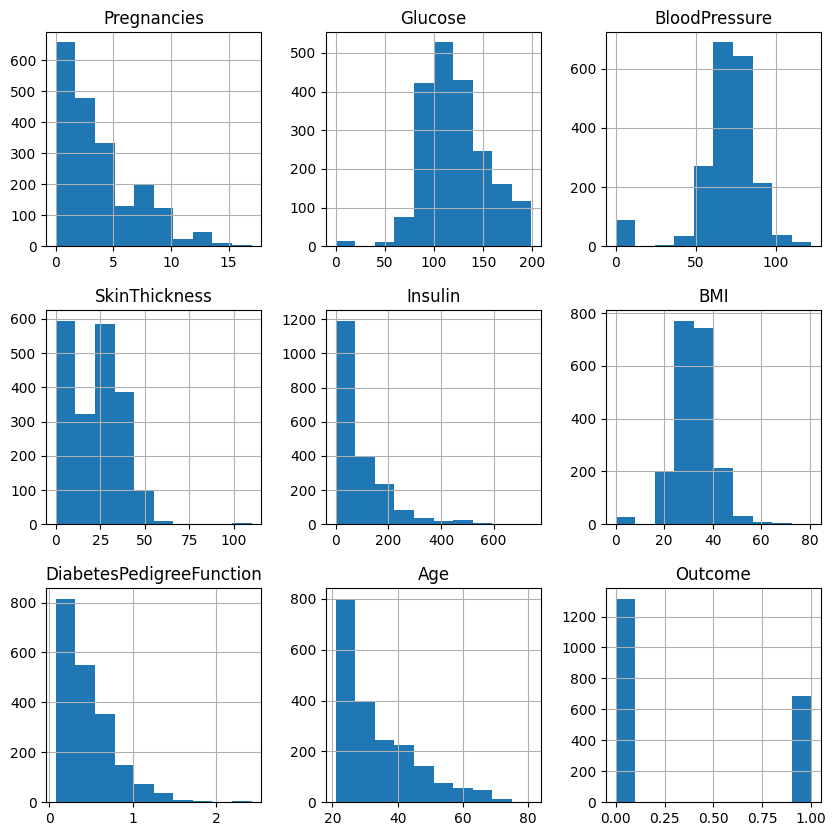

In [6]:
#histogram
df.hist(bins=10,figsize=(10,10))
plt.show()

<Axes: >

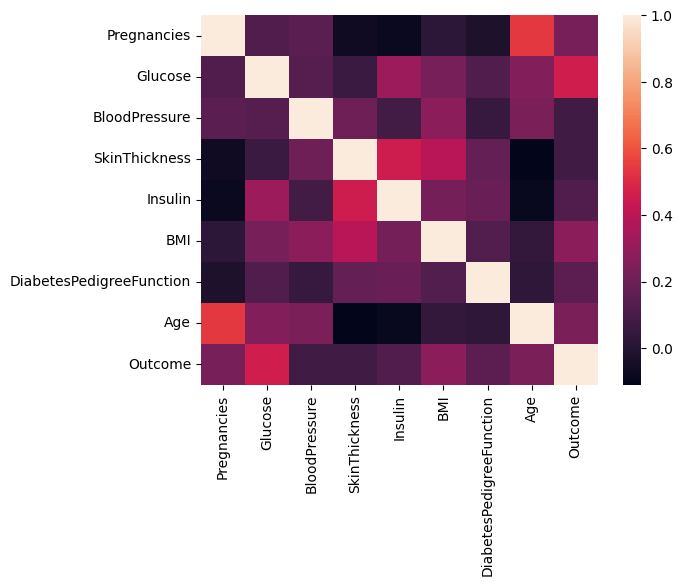

In [7]:
#correlation
sns.heatmap(df.corr())
# we can see skin thickness,insulin,pregnencies and age are full independent to each other
#age and pregencies has negative correlation

<Axes: xlabel='count', ylabel='Outcome'>

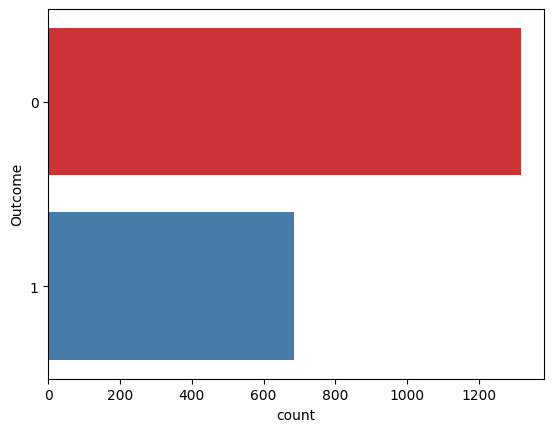

In [5]:
#lets count total outcome in each target 0 1
#0 means no diabeted
#1 means patient with diabtes
sns.countplot(y=df['Outcome'],palette='Set1')

In [6]:
#outlier remove

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

print("---Q1--- \n",Q1)
print("\n---Q3--- \n",Q3)
print("\n---IQR---\n",IQR)



---Q1--- 
 Pregnancies                  1.000
Glucose                     99.000
BloodPressure               63.500
SkinThickness                0.000
Insulin                      0.000
BMI                         27.375
DiabetesPedigreeFunction     0.244
Age                         24.000
Outcome                      0.000
Name: 0.25, dtype: float64

---Q3--- 
 Pregnancies                   6.000
Glucose                     141.000
BloodPressure                80.000
SkinThickness                32.000
Insulin                     130.000
BMI                          36.800
DiabetesPedigreeFunction      0.624
Age                          40.000
Outcome                       1.000
Name: 0.75, dtype: float64

---IQR---
 Pregnancies                   5.000
Glucose                      42.000
BloodPressure                16.500
SkinThickness                32.000
Insulin                     130.000
BMI                           9.425
DiabetesPedigreeFunction      0.380
Age                 

In [7]:
#outlier remove
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape,df_out.shape
#more than 80 records deleted

((2000, 9), (1652, 9))

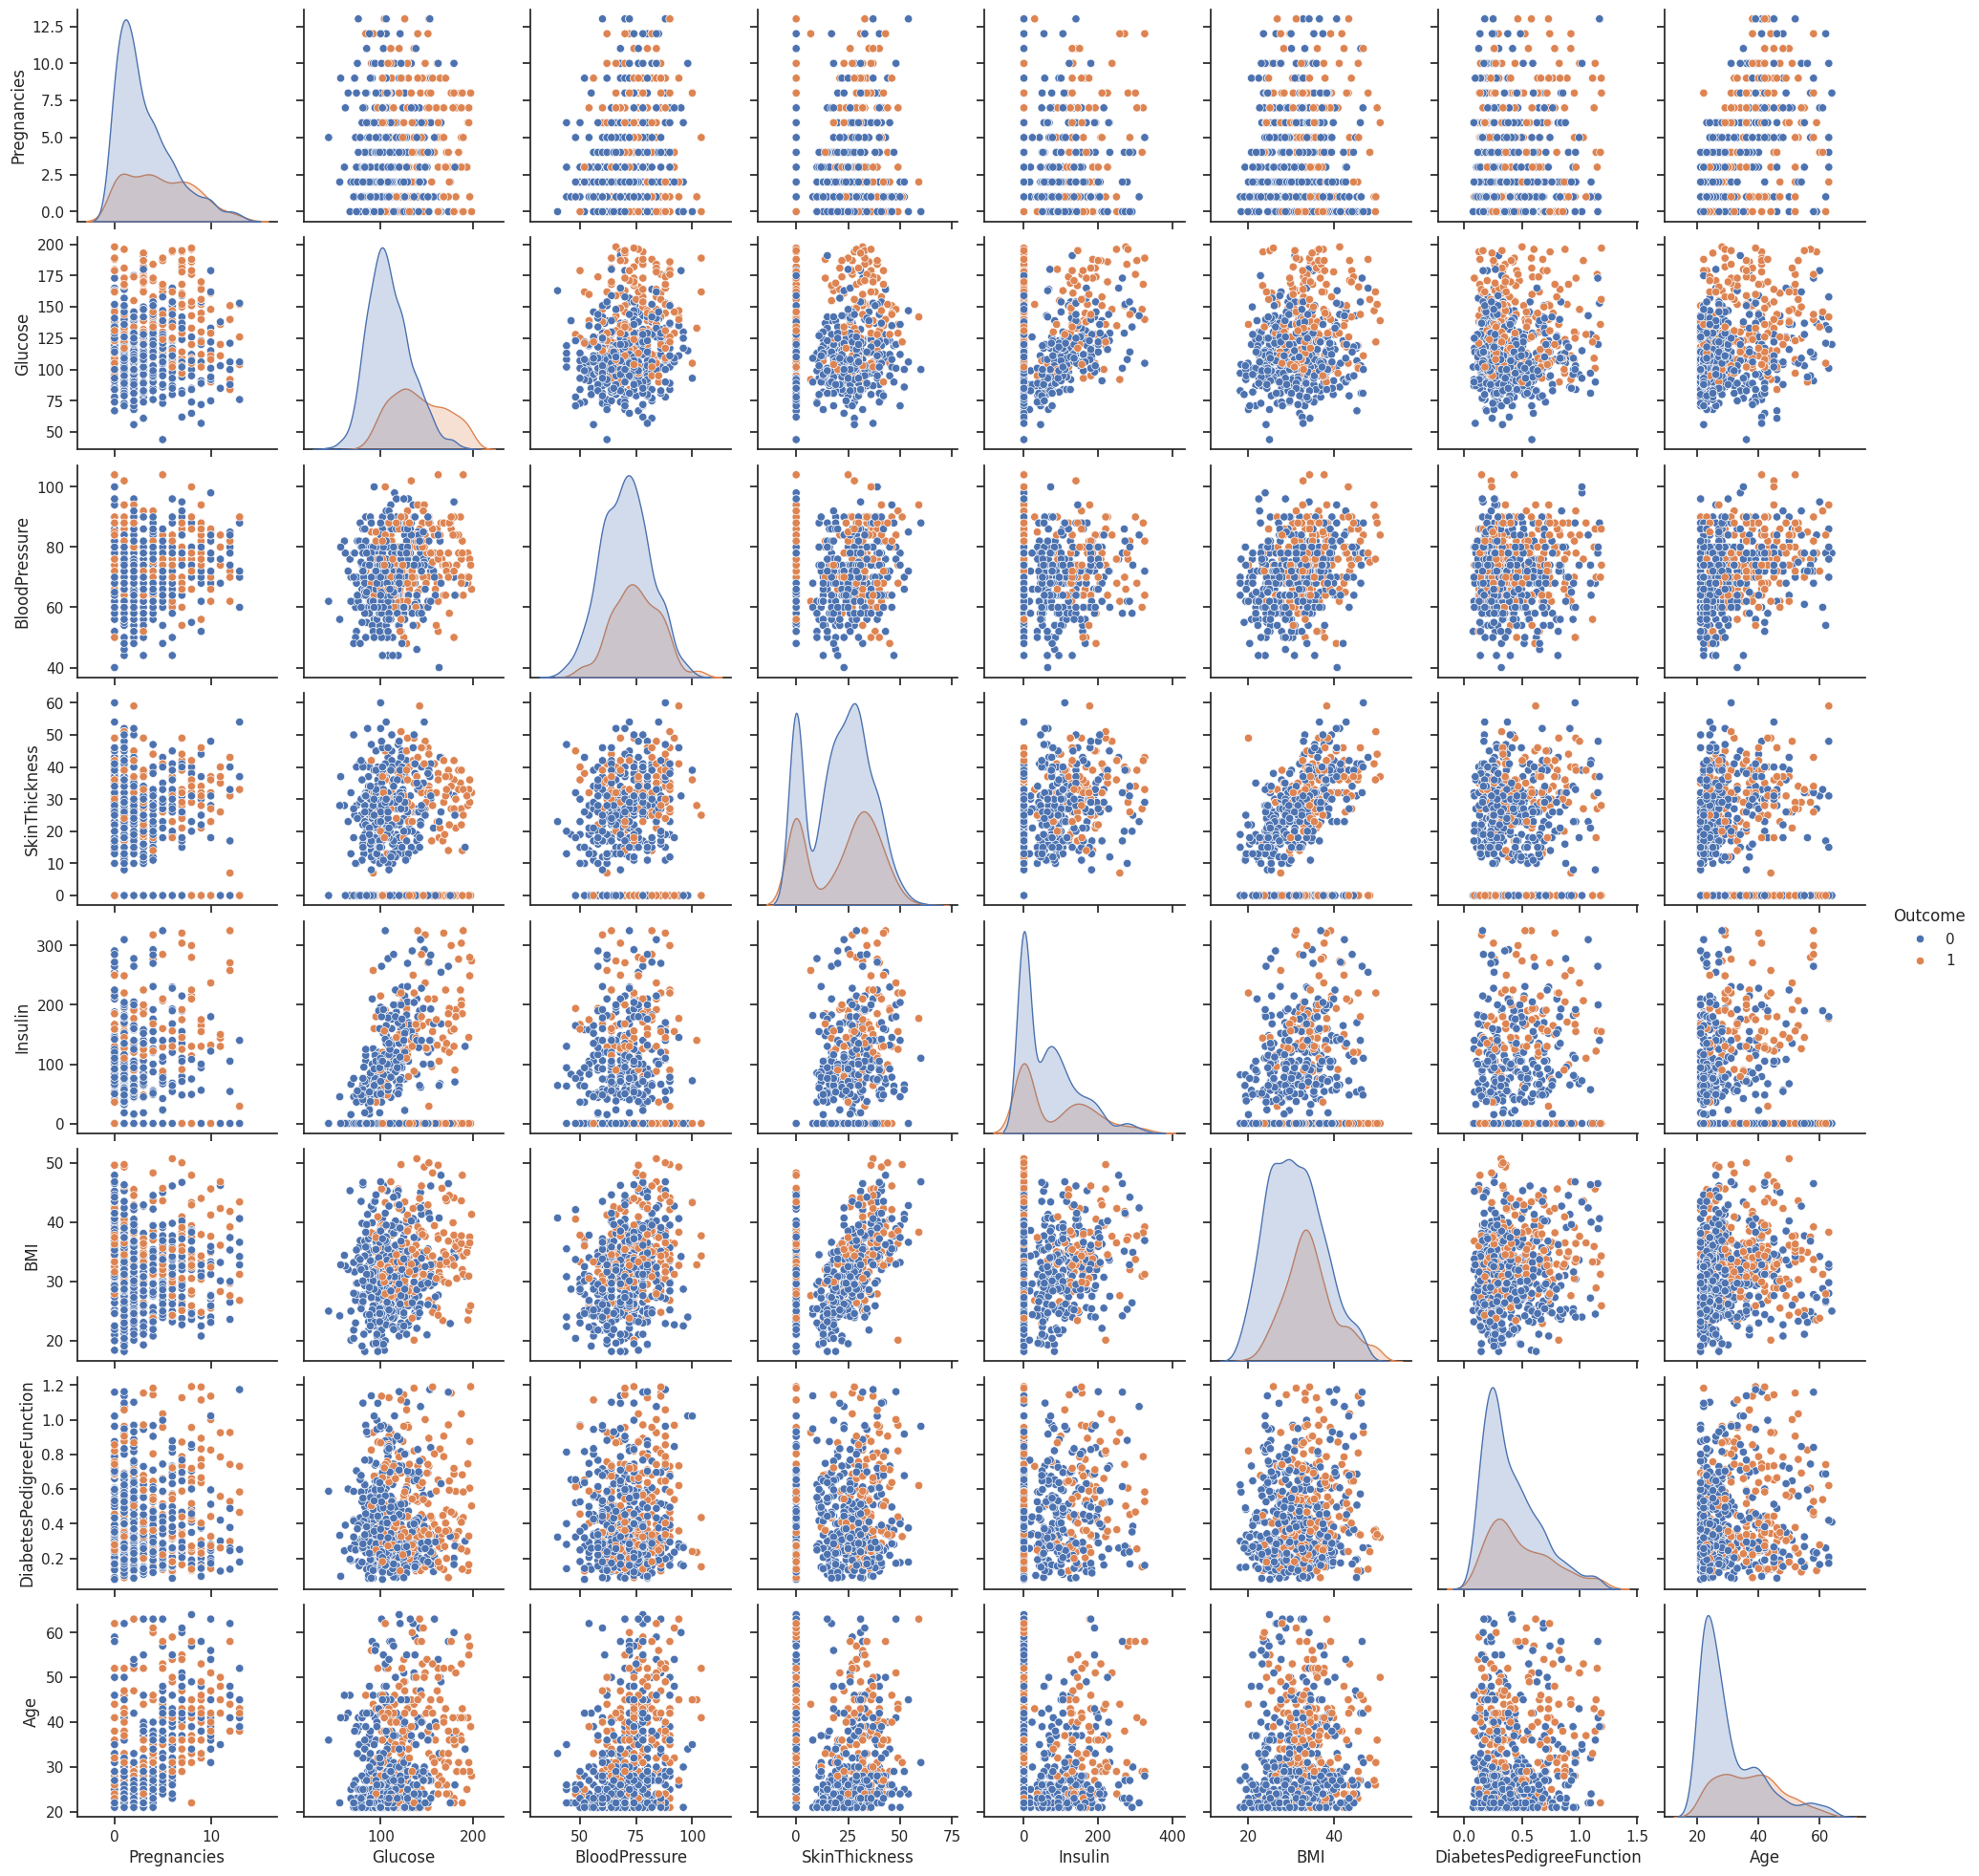

In [11]:
#Scatter matrix after removing outlier
sns.set(style="ticks")
sns.pairplot(df_out, hue="Outcome")
plt.show()

In [8]:
#lets extract features and targets
X=df_out.drop(columns=['Outcome'])
y=df_out['Outcome']

In [9]:
#Splitting train test data 80 20 ratio
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)

In [10]:
def matrixdisplay(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])

    plt.title('Confusion Matrix')
    plt.show()

# Logistic Regression


Accuracy 0.7854984894259819
ROC 0.7201157860404437


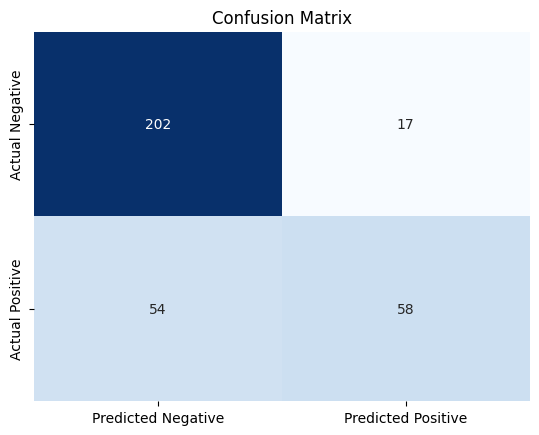

Classification Report

              precision    recall  f1-score   support

           1       0.77      0.52      0.62       112
           0       0.79      0.92      0.85       219

    accuracy                           0.79       331
   macro avg       0.78      0.72      0.74       331
weighted avg       0.78      0.79      0.77       331



In [11]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

acc=[]
roc=[]

clf=LogisticRegression(max_iter=1000)
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0}\nROC {1}".format(ac,rc))

matrixdisplay(test_y, y_pred)
#display predicted values 
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred})
print ("Classification Report\n")

print ("{0}".format(metrics.classification_report(test_y, y_pred, labels=[ 1,0])))

# Support Vector Machine


Accuracy 0.7885196374622356 ROC 0.7158553489889107
Classification Report

              precision    recall  f1-score   support

           1       0.81      0.49      0.61       112
           0       0.78      0.94      0.85       219

    accuracy                           0.79       331
   macro avg       0.80      0.72      0.73       331
weighted avg       0.79      0.79      0.77       331



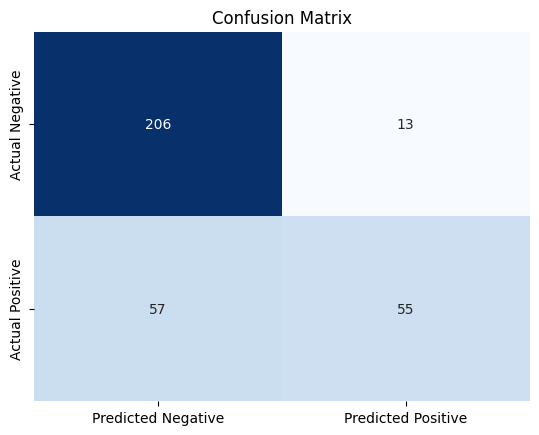

In [12]:
from sklearn.svm import SVC

clf=SVC(kernel='linear')
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

print ("Classification Report\n")

print ("{0}".format(metrics.classification_report(test_y, y_pred, labels=[ 1,0])))
matrixdisplay(test_y, y_pred)

# KNN


Accuracy 0.8549848942598187 ROC 0.8206131767775604
Classification Report

              precision    recall  f1-score   support

           1       0.83      0.71      0.77       112
           0       0.86      0.93      0.89       219

    accuracy                           0.85       331
   macro avg       0.85      0.82      0.83       331
weighted avg       0.85      0.85      0.85       331



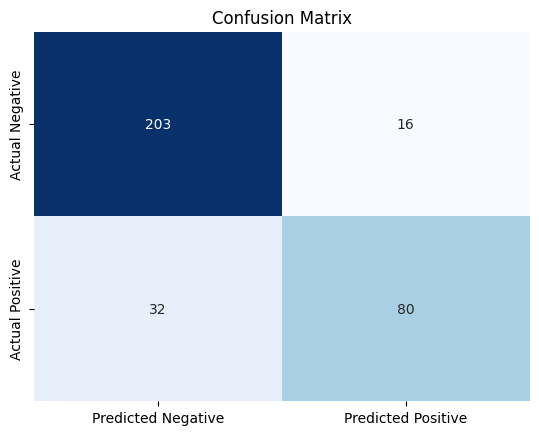

In [13]:

from sklearn.neighbors import KNeighborsClassifier

clf=KNeighborsClassifier(n_neighbors=3)
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

print ("Classification Report\n")

print ("{0}".format(metrics.classification_report(test_y, y_pred, labels=[ 1,0])))
matrixdisplay(test_y, y_pred)

# Naive Bayes Theorem


Accuracy 0.8036253776435045 ROC 0.7599885844748858


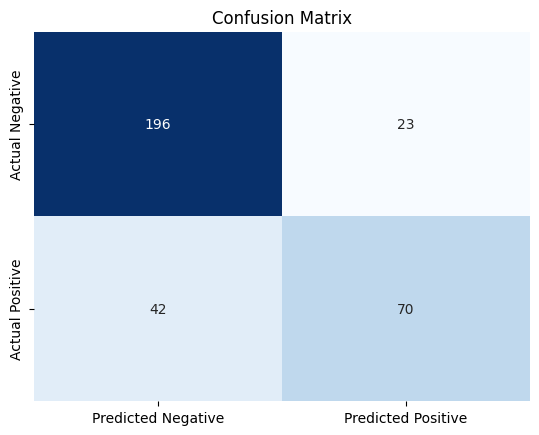

Classification Report

              precision    recall  f1-score   support

           1       0.75      0.62      0.68       112
           0       0.82      0.89      0.86       219

    accuracy                           0.80       331
   macro avg       0.79      0.76      0.77       331
weighted avg       0.80      0.80      0.80       331



In [14]:
from sklearn.naive_bayes import GaussianNB

clf=GaussianNB()
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))
matrixdisplay(test_y, y_pred)
print ("Classification Report\n")
print ("{0}".format(metrics.classification_report(test_y, y_pred, labels=[ 1,0])))

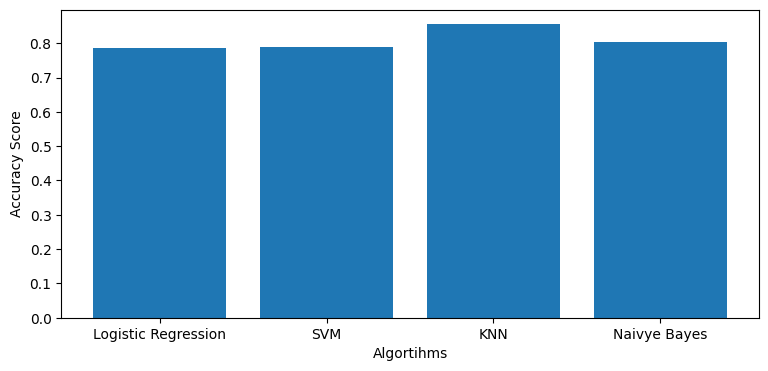

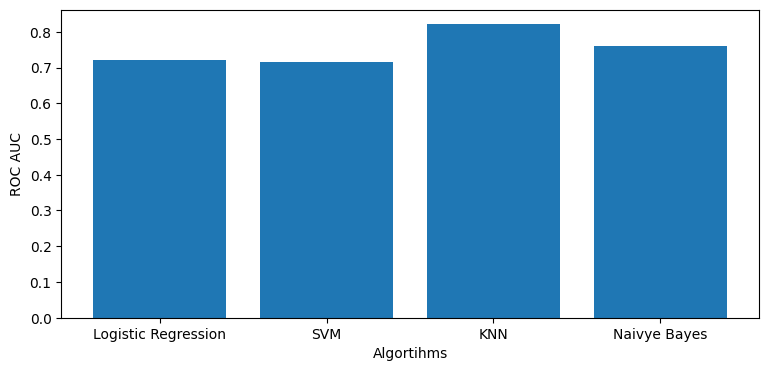

In [15]:
#lets plot the bar graph

ax=plt.figure(figsize=(9,4))
plt.bar(['Logistic Regression','SVM','KNN','Naivye Bayes'],acc,label='Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Algortihms')
plt.show()

ax=plt.figure(figsize=(9,4))
plt.bar(['Logistic Regression','SVM','KNN','Naivye Bayes'],roc,label='ROC AUC')
plt.ylabel('ROC AUC')
plt.xlabel('Algortihms')
plt.show()

Great....
KNN has highest accuracy 87% and ROC_AUC curve 85%.
model can be improve more if we take same count of labels
in our model 30% is diabetic and 70% no diabetic patient.
model can be improve with fine tunning